In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import os
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import math
from mpl_toolkits import mplot3d
from tqdm import tqdm # progress bars

In [3]:
# import files

# MaxLFQ FDR5
import_LFQ_FDR5 = 'output_SAINTexpress_AtlasMaxLFQ_FDR5.txt'
LFQ_FDR5_sheet = pd.read_csv(import_LFQ_FDR5, sep='\t')

# Scaffold FDR5
import_spec_FDR5 = 'output_SAINTexpress_ScaffoldSpecCounts_FDR5.txt'
spec_FDR5_sheet = pd.read_csv(import_spec_FDR5, sep='\t')

### add localizations

In [4]:
# import localizations
pred_loc_fname = 'PBChlamy_v5.6_v6.1.xlsx'
real_loc_fname = 'S6_experimental_localizations.xlsx'

# read experimental localizations conversion file
real_loc=pd.read_excel(real_loc_fname, skiprows=1)
real_loc['CreID'] = real_loc['CreID'].str.strip()
real_loc['Classification'] = real_loc['Classification'].str.strip()
real_loc_dict=real_loc.set_index('CreID')['Classification'].to_dict()

# read PB-Chlamy predicted localizations conversion file
pred_loc=pd.read_excel(pred_loc_fname, skiprows=0)
pred_loc['gene_ID'] = pred_loc['gene_ID'].str.strip()
pred_loc['predicted loc'] = pred_loc['predicted loc'].str.strip()
pred_loc_dict=pred_loc.set_index('gene_ID')['predicted loc'].to_dict()

In [5]:
# get experimental bait localizations
bait_cre = LFQ_FDR5_sheet['Bait']
exp_bait_loc_list = []
missed = []

print('No localization found in S6 for:')

for i in range(bait_cre.shape[0]):
    ID = bait_cre.to_numpy()[i]
    
    if ID in real_loc_dict:
        exp_bait_loc_list.append(real_loc_dict[ID])
    elif ID == 'SAGA1' or ID == 'MITH1':
        exp_bait_loc_list.append('chloroplast')
    else:
        exp_bait_loc_list.append('Not Found')
        print(ID)
        missed.append(ID)

print(missed)
LFQ_FDR5_sheet['Bait Exp Loc'] = np.array(exp_bait_loc_list)



# get experimental bait localizations
bait_cre = spec_FDR5_sheet['Bait']
exp_bait_loc_list = []
missed = []

print('No localization found in S6 for:')

for i in range(bait_cre.shape[0]):
    ID = bait_cre.to_numpy()[i]
    
    if ID in real_loc_dict:
        exp_bait_loc_list.append(real_loc_dict[ID])
    elif ID == 'SAGA1' or ID == 'MITH1':
        exp_bait_loc_list.append('chloroplast')
    else:
        exp_bait_loc_list.append('Not Found')
        print(ID)
        missed.append(ID)

print(missed)
spec_FDR5_sheet['Bait Exp Loc'] = np.array(exp_bait_loc_list)

No localization found in S6 for:
[]
No localization found in S6 for:
[]


In [6]:
# get predicted bait localizations
bait_cre = LFQ_FDR5_sheet['Bait']
creID_mat = bait_cre.to_numpy()
pred_bait_loc_list = []


print('No localization found for:')

for i in range(creID_mat.shape[0]):
    ID = creID_mat[i]
    if ID in pred_loc_dict:
        pred_bait_loc_list.append(pred_loc_dict[ID])
    elif ID != 0:
        if ('CreCp' in ID) or ('Chloroplast Genome' in ID):
            pred_bait_loc_list.append('Chloroplast')
        elif ('SAGA1' in ID) or ('MITH1' in ID):
            pred_bait_loc_list.append('Chloroplast')
        else:
            pred_bait_loc_list.append('Not Found')
            print(ID, "in PB-Chlamy")
    else:
        pred_bait_loc_list.append('Not Found')
        print(ID, "in PB-Chlamy")
        
LFQ_FDR5_sheet['Bait Pred Loc'] = np.array(pred_bait_loc_list)





# get predicted bait localizations
bait_cre = spec_FDR5_sheet['Bait']
creID_mat = bait_cre.to_numpy()
pred_bait_loc_list = []


print('No localization found for:')

for i in range(creID_mat.shape[0]):
    ID = creID_mat[i]
    if ID in pred_loc_dict:
        pred_bait_loc_list.append(pred_loc_dict[ID])
    elif ID != 0:
        if ('CreCp' in ID) or ('Chloroplast Genome' in ID):
            pred_bait_loc_list.append('Chloroplast')
        elif ('SAGA1' in ID) or ('MITH1' in ID):
            pred_bait_loc_list.append('Chloroplast')
        else:
            pred_bait_loc_list.append('Not Found')
            print(ID, "in PB-Chlamy")
    else:
        pred_bait_loc_list.append('Not Found')
        print(ID, "in PB-Chlamy")
        
spec_FDR5_sheet['Bait Pred Loc'] = np.array(pred_bait_loc_list)

No localization found for:
Cre11.g467709 in PB-Chlamy
Cre11.g467709 in PB-Chlamy
Cre11.g467709 in PB-Chlamy
Cre11.g467709 in PB-Chlamy
Cre12.g544114 in PB-Chlamy
Cre12.g544114 in PB-Chlamy
Cre12.g544114 in PB-Chlamy
Cre12.g544114 in PB-Chlamy
Cre12.g544114 in PB-Chlamy
Cre12.g544114 in PB-Chlamy
Cre12.g544114 in PB-Chlamy
Cre12.g544114 in PB-Chlamy
Cre12.g544114 in PB-Chlamy
Cre12.g544114 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
No localization found for:
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
Cre01.g005534 in PB-Chlamy
C

In [7]:
# get predicted prey localizations (for first CreID listed)
prey_cre = LFQ_FDR5_sheet['Prey']
creID_mat = prey_cre.to_numpy()
pred_prey_loc_list = []

print('No localization found for:')

for i in range(creID_mat.shape[0]):
    ID = creID_mat[i][:13]
    if ID in pred_loc_dict:
        pred_prey_loc_list.append(pred_loc_dict[ID])
    elif ID != 0:
        if ('CreCp' in ID) or ('Chloroplast Genome' in ID):
            pred_prey_loc_list.append('Chloroplast encoded')
        else:
            pred_prey_loc_list.append('Not Found')
            print(ID, "in PB-Chlamy")
    else:
        pred_prey_loc_list.append('Not Found')
        print(ID, "in PB-Chlamy")

                
LFQ_FDR5_sheet['Prey Pred Loc'] = np.array(pred_prey_loc_list)
        

# get predicted prey localizations (for first CreID listed)
prey_cre = spec_FDR5_sheet['Prey']
creID_mat = prey_cre.to_numpy()
pred_prey_loc_list = []

print('No localization found for:')

for i in range(creID_mat.shape[0]):
    ID = creID_mat[i][:13]
    if ID in pred_loc_dict:
        pred_prey_loc_list.append(pred_loc_dict[ID])
    elif ID != 0:
        if ('CreCp' in ID) or ('Chloroplast Genome' in ID):
            pred_prey_loc_list.append('Chloroplast encoded')
        else:
            pred_prey_loc_list.append('Not Found')
            print(ID, "in PB-Chlamy")
    else:
        pred_prey_loc_list.append('Not Found')
        print(ID, "in PB-Chlamy")
        
spec_FDR5_sheet['Prey Pred Loc'] = np.array(pred_prey_loc_list)

No localization found for:
No localization found for:
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG

In [8]:
# convert experimental localizations to binary for chloroplast, mitochondria, and secretory pathway
# (for easy comparison to prey predicted localizations)
bait_loc = np.array(list(real_loc_dict.values()) + ['chloroplast'])
exp_loc_list = np.unique(bait_loc)
exp_loc_binary = np.zeros([exp_loc_list.shape[0],4])
exp_loc_dict = {}

chloroplast_list = np.zeros_like(exp_loc_list)
mitochon_list = np.zeros_like(exp_loc_list)
secretory_list = np.zeros_like(exp_loc_list)


# exp_loc_summary = []

category_list = np.array([])
for i in range(exp_loc_list.shape[0]):
    loc = exp_loc_list[i]
    categories = loc.split('; ')
    for cat in categories:
        category_list = np.append(category_list, cat)
        if ('chloroplast' in cat) or ('Chloroplast' in cat):
            exp_loc_binary[i][0] = 1
            
        if ('mitochondria' in cat):
            exp_loc_binary[i][1] = 1
        
        if ('secretory' in cat):
            exp_loc_binary[i][2] = 1
        
        if ('nucleus-facing' in cat):
            continue
        elif ('centrosome' in cat) or ('cytosol' in cat) or ('cytoplasm' in cat) or ('nucleus' in cat):
            exp_loc_binary[i][3] = 1
            
    exp_loc_dict[loc] = exp_loc_binary[i]

In [9]:
# determine localization match
loc_match_col = []

for i in range(LFQ_FDR5_sheet.shape[0]):
    bait_loc = LFQ_FDR5_sheet['Bait Exp Loc'].iloc[i]
    bait_loc_mat = exp_loc_dict[bait_loc]
    prey_loc = LFQ_FDR5_sheet['Prey Pred Loc'].iloc[i]
    
    loc_match_col.append((('Chloroplast' in prey_loc) and (bait_loc_mat[0] == 1)
                         or ('Mitochondrial' in prey_loc) and (bait_loc_mat[1] == 1)
                         or ('Secretory' in prey_loc) and (bait_loc_mat[2] == 1)))
    
LFQ_FDR5_sheet['Loc Match'] = loc_match_col


# determine localization match
loc_match_col = []

for i in range(spec_FDR5_sheet.shape[0]):
    bait_loc = spec_FDR5_sheet['Bait Exp Loc'].iloc[i]
    bait_loc_mat = exp_loc_dict[bait_loc]
    prey_loc = spec_FDR5_sheet['Prey Pred Loc'].iloc[i]
    
    loc_match_col.append((('Chloroplast' in prey_loc) and (bait_loc_mat[0] == 1)
                         or ('Mitochondrial' in prey_loc) and (bait_loc_mat[1] == 1)
                         or ('Secretory' in prey_loc) and (bait_loc_mat[2] == 1)))
    
spec_FDR5_sheet['Loc Match'] = loc_match_col

In [10]:
# loc match %
def P_match(thresh, interaction_df):
    thresh_df = interaction_df[interaction_df['AvgP'] >= thresh]
    num_thresh = thresh_df.shape[0]
    num_match_thresh = thresh_df[thresh_df['Loc Match'] == 1].shape[0]
    if num_thresh > 0: return (num_match_thresh, num_thresh, num_match_thresh / num_thresh)
    else: return -1


print(LFQ_FDR5_sheet.shape[0], 'interactions')
print(np.unique(LFQ_FDR5_sheet['Prey']).shape[0], 'prey')
print('LFQ FDR5 AvgP >= 0.5:', P_match(0.5, LFQ_FDR5_sheet))
print('LFQ FDR5 AvgP >= 0.8:', P_match(0.8, LFQ_FDR5_sheet))
print('LFQ FDR5 AvgP >= 0.9:', P_match(0.9, LFQ_FDR5_sheet))
print('')


print(spec_FDR5_sheet.shape[0], 'interactions')
print(np.unique(spec_FDR5_sheet['Prey']).shape[0], 'prey')
print('Spec FDR5 AvgP >= 0.5:', P_match(0.5, spec_FDR5_sheet))
print('Spec FDR5 AvgP >= 0.8:', P_match(0.8, spec_FDR5_sheet))
print('Spec FDR5 AvgP >= 0.9:', P_match(0.9, spec_FDR5_sheet))

700 interactions
119 prey
LFQ FDR5 AvgP >= 0.5: (254, 631, 0.40253565768621236)
LFQ FDR5 AvgP >= 0.8: (59, 123, 0.4796747967479675)
LFQ FDR5 AvgP >= 0.9: (59, 123, 0.4796747967479675)

31569 interactions
3815 prey
Spec FDR5 AvgP >= 0.5: (855, 1868, 0.45770877944325483)
Spec FDR5 AvgP >= 0.8: (275, 515, 0.5339805825242718)
Spec FDR5 AvgP >= 0.9: (249, 450, 0.5533333333333333)


In [11]:
# loc match with no Other
def P_match_noOther(thresh, interaction_df):
    df = interaction_df[interaction_df['Prey Pred Loc'] != 'Other'].copy()
    thresh_df = df[df['AvgP'] >= thresh]
    num_thresh = thresh_df.shape[0]
    num_match_thresh = thresh_df[thresh_df['Loc Match'] == 1].shape[0]
    if num_thresh > 0: return (num_match_thresh, num_thresh, num_match_thresh / num_thresh)
    else: return -1
    

print(LFQ_FDR5_sheet.shape[0], 'interactions')
print(np.unique(LFQ_FDR5_sheet['Prey']).shape[0], 'prey')
print('LFQ FDR5 AvgP >= 0.5:', P_match_noOther(0.5, LFQ_FDR5_sheet))
print('LFQ FDR5 AvgP >= 0.8:', P_match_noOther(0.8, LFQ_FDR5_sheet))
print('LFQ FDR5 AvgP >= 0.9:', P_match_noOther(0.9, LFQ_FDR5_sheet))
print('')


print(spec_FDR5_sheet.shape[0], 'interactions')
print(np.unique(spec_FDR5_sheet['Prey']).shape[0], 'prey')
print('Spec FDR5 AvgP >= 0.5:', P_match_noOther(0.5, spec_FDR5_sheet))
print('Spec FDR5 AvgP >= 0.8:', P_match_noOther(0.8, spec_FDR5_sheet))
print('Spec FDR5 AvgP >= 0.9:', P_match_noOther(0.9, spec_FDR5_sheet))

700 interactions
119 prey
LFQ FDR5 AvgP >= 0.5: (254, 413, 0.6150121065375302)
LFQ FDR5 AvgP >= 0.8: (59, 91, 0.6483516483516484)
LFQ FDR5 AvgP >= 0.9: (59, 91, 0.6483516483516484)

31569 interactions
3815 prey
Spec FDR5 AvgP >= 0.5: (855, 1081, 0.7909343200740055)
Spec FDR5 AvgP >= 0.8: (275, 316, 0.870253164556962)
Spec FDR5 AvgP >= 0.9: (249, 283, 0.8798586572438163)


### atlas subset Phytozome Scaffold WD

In [12]:
# import Phytozome atlas dataset WD scores
import_Phyto_WD = "WD_counts1_zscore_20230701_AtlasSubset_PDSpecCountsFDR5%_noDecoy.xlsx"

# import WD scores
full_sheet = pd.read_excel(import_Phyto_WD, 
                           sheet_name = 0,
                           index_col = 0,
                           skiprows = 0) # load from sheet 1, start at 1st row

# import p values
p_full_sheet = pd.read_excel(import_Phyto_WD,
                        sheet_name = 1,
                        index_col = 0,
                        skiprows = 0)

# import z scores
z_full_sheet = pd.read_excel(import_Phyto_WD,
                        sheet_name = 2,
                        index_col = 0,
                        skiprows = 0)


In [13]:
# process full_sheet -- create sheet and matrix of WD scores

start_col = 9 # first bait is at 10th column in full_sheet
start_row = 8

bait_creID = full_sheet.loc['Bait CreID'][start_col:]
prey_creID = full_sheet['Prey CreID'].iloc[start_row:]

bait_loc = full_sheet.loc['Bait Experimental Localization'][start_col:]
bait_loc.index = bait_creID.to_numpy()
bait_loc = bait_loc.replace(np.nan, 'N/A') # change NaNs to N/A

bait_pred_loc = full_sheet.loc['Bait PB-Chlamy Predicted Localization'][start_col:]
bait_pred_loc.index = bait_creID.to_numpy()

bait_predalgo_loc = full_sheet.loc['Bait PredAlgo Predicted Localization'][start_col:]
bait_predalgo_loc.index = bait_creID.to_numpy()

prey_pred_loc = full_sheet['Prey PB-Chlamy Predicted Localization'].iloc[start_row:]
prey_pred_loc.index = prey_creID.to_numpy()

prey_predalgo_loc = full_sheet['Prey PredAlgo Predicted Localization'].iloc[start_row:]
prey_predalgo_loc.index = prey_creID.to_numpy()

prey_exp_loc = full_sheet['Prey Experimental Localization'].iloc[start_row:]
prey_exp_loc.index = prey_creID.to_numpy()


# create WD matrix

WD_mat = full_sheet.iloc[start_row:,start_col:].to_numpy().astype('float')
WD_nonzero = WD_mat[WD_mat > 0]

# create WD dataframe with column named with bait CreID, rows named with prey creID
WD_sheet = full_sheet.iloc[start_row:,start_col:].copy()
WD_sheet.columns = bait_creID.to_numpy()
WD_sheet.index = prey_creID.to_numpy()

num_interactions = WD_mat.shape[0]*WD_mat.shape[1]

# create p value matrix
p_mat = p_full_sheet.iloc[start_row:,start_col:].to_numpy()

# create p value dataframe
p_sheet = p_full_sheet.iloc[start_row:,start_col:].copy()
p_sheet.columns = bait_creID.to_numpy()
p_sheet.index = prey_creID.to_numpy()


# create raw z score matrix
z_mat = z_full_sheet.iloc[start_row:,start_col:].to_numpy()

# create p value dataframe
z_sheet = z_full_sheet.iloc[start_row:,start_col:].copy()
z_sheet.columns = bait_creID.to_numpy()
z_sheet.index = prey_creID.to_numpy()


# convert experimental localizations to binary for chloroplast, mitochondria, and secretory pathway
# (for easy comparison to prey predicted localizations)
exp_loc_list = np.unique(bait_loc.to_numpy())
exp_loc_binary = np.zeros([exp_loc_list.shape[0],3])
exp_loc_dict_Phyto = {}

chloroplast_list = np.zeros_like(exp_loc_list)
mitochon_list = np.zeros_like(exp_loc_list)
secretory_list = np.zeros_like(exp_loc_list)


# exp_loc_summary = []

category_list = np.array([])
for i in range(exp_loc_list.shape[0]):
    loc = exp_loc_list[i]
    categories = loc.split('; ')
    for cat in categories:
        category_list = np.append(category_list, cat)
        if ('chloroplast' in cat) or ('Chloroplast' in cat):
            exp_loc_binary[i][0] = 1
            
        if ('mitochondria' in cat):
            exp_loc_binary[i][1] = 1
        
        if ('secretory' in cat):
            exp_loc_binary[i][2] = 1
            
    exp_loc_dict_Phyto[loc] = exp_loc_binary[i]

In [14]:
# create list of each interaction with: (takes a few mins)
# bait CreID, prey CreID, 
# bait and prey localization (binary columns for chloroplast, mitochondria, secretory)
# WD score, raw z score, WD z score, p value

baitID_col = np.empty(num_interactions, dtype='O')
preyID_col = np.empty(num_interactions, dtype='O')

bait_loc_col = np.empty(num_interactions, dtype='O') # experimental
bait_pred_loc_col = np.empty(num_interactions, dtype='O') # PB-Chlamy
bait_predalgo_loc_col = np.empty(num_interactions, dtype='O') # PredAlgo

prey_loc_col =  np.empty(num_interactions, dtype='O') # PB-Chlamy
prey_exp_loc_col = np.empty(num_interactions, dtype='O') # experimental
prey_predalgo_loc_col = np.empty(num_interactions, dtype='O') # PredAlgo
loc_match_col = np.zeros(num_interactions) # compare bait experimental to prey PB-Chlamy
bait_loc_array = np.zeros((num_interactions,3)) # based on bait experimental

WD_col = np.zeros(num_interactions, dtype='float')
p_col = np.zeros(num_interactions)
z_col = np.zeros(num_interactions, dtype='float')

index = 0 # interaction index
for i in tqdm(range(bait_creID.shape[0])): # loop over baits
    bait_loc_mat = exp_loc_dict_Phyto[bait_loc.iloc[i]]
    bait = bait_creID.iloc[i]
    
    for j in range(prey_creID.shape[0]): # loop over preys
        prey = prey_creID.iloc[j]
        
        baitID_col[index] = bait_creID.iloc[i]
        preyID_col[index] = prey_creID.iloc[j]
        
        
        # localizations    
        prey_loc = prey_pred_loc.iloc[j]
        bait_loc_col[index] = bait_loc.iloc[i]
        prey_loc_col[index] = prey_loc
        bait_loc_array[index] = bait_loc_mat
        
        bait_pred_loc_col[index] = bait_pred_loc[i]
        bait_predalgo_loc_col[index] = bait_predalgo_loc[i]
        prey_exp_loc_col[index] = prey_exp_loc[j]
        prey_predalgo_loc_col[index] = prey_predalgo_loc[j]
        
        # check if any overlap in localization of bait experimental and prey PB-Chlamy predicted loc
        loc_match_col[index] = (('Chloroplast' in prey_loc) and (bait_loc_mat[0] == 1)
                     or ('Mitochondrial' in prey_loc) and (bait_loc_mat[1] == 1)
                     or ('Secretory' in prey_loc) and (bait_loc_mat[2] == 1))
        
        
        
        WD_col[index] = WD_mat[j][i]
        p_col[index] = p_mat[j][i]
        z_col[index] = z_mat[j][i]

        index += 1 # increment interaction index
        
# create dataframe of interactions
interaction_df_Phyto = pd.DataFrame(data=baitID_col, columns=['Bait CreID'])
interaction_df_Phyto['Prey CreID'] = preyID_col
interaction_df_Phyto['WD Score'] = WD_col
interaction_df_Phyto['Z Score'] = z_col

interaction_df_Phyto['Bait Experimental Localization'] = bait_loc_col
interaction_df_Phyto['Bait PB-Chlamy Predicted Localization'] = bait_pred_loc_col
interaction_df_Phyto['Bait PredAlgo Predicted Localization'] = bait_predalgo_loc_col

interaction_df_Phyto['Prey PB-Chlamy Predicted Localization'] = prey_loc_col
interaction_df_Phyto['Prey Experimental Localization'] = prey_exp_loc_col
interaction_df_Phyto['Prey PredAlgo Predicted Localization'] = prey_predalgo_loc_col

interaction_df_Phyto['Localization Match'] = loc_match_col
interaction_df_Phyto['p Value'] = p_col


WD_sheet_Phyto = WD_sheet.copy()

100%|███████████████████████████████████████████| 68/68 [00:13<00:00,  5.06it/s]


In [15]:
WD_sheet_Phyto

,Cre01.g005534,Cre01.g028350,Cre01.g045550,Cre01.g047800,Cre01.g049000,Cre01.g050950,Cre02.g081750,Cre02.g091250,Cre02.g120100,Cre02.g143635,...,Cre16.g663800,Cre16.g672300,Cre16.g678000,Cre16.g682200,Cre16.g683750,Cre16.g688800,Cre17.g700450,Cre17.g734100,Cre24.g755197,Venus-3xFLAG
Cre12.g551050,6.892024,6.819091,6.480741,5.522681,4.472136,5.787918,4.690416,5.43139,4.41588,6.244998,...,7,6,8.514693,5.477226,7.17635,5.477226,4.743416,4.527693,6.082763,9.137833
Venus-FLAG,3,5.43139,4.472136,5.049752,6.041523,6.63325,4.743416,2.645751,9.407444,6,...,4.84768,5.744563,3.162278,5.700877,4.358899,5.049752,2.54951,6.557439,5.338539,11.357817
Cre06.g258800,5.244044,5.385165,4.743416,4.062019,4.242641,4.690416,3.464102,3.535534,3.24037,3.937004,...,4.898979,4,4.358899,3.464102,4.41588,3.674235,3.24037,3.535534,4.636809,6.480741
Cre13.g592500,3.391165,4.949747,4.743416,3.605551,4.582576,4.527693,4.898979,4,2.915476,3.162278,...,4.062019,4.062019,4.1833,4.123106,3.391165,2.915476,5.147815,4,4.062019,4.636809
CreCp.g802313,7.480352,7.480352,7.096485,8.194316,9.461981,10.310954,8.194316,7.096485,68.599359,34.523265,...,6.690631,6.258512,9.161523,7.480352,8.850872,5.289408,7.84546,8.528914,8.850872,10.840061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cre10.g446950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cre02.g117781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cre17.g802029,0,0,0,0,16.682386,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cre13.g571150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### plot % loc match (no bait/prey Other) vs num interactions

#### make interaction lists with no Other localizations

In [16]:
# Scaffold WD atlas set:
keep_inds = []

for i in tqdm(range(interaction_df_Phyto.shape[0])):
    bloc = interaction_df_Phyto['Bait Experimental Localization'].iloc[i]
    bloc_code = exp_loc_dict_Phyto[bloc]
    
    if np.sum(bloc_code[0:3]) > 0: # keep if bait is in chloroplast, mitochondria, or secretory
        keep_inds.append(i)

interaction_noBaitOther_Phyto = interaction_df_Phyto.iloc[keep_inds,:].copy()

interaction_noOther_Phyto = interaction_noBaitOther_Phyto[interaction_noBaitOther_Phyto['Prey PB-Chlamy Predicted Localization'] != 'Other']


100%|████████████████████████████████| 260100/260100 [00:06<00:00, 40877.17it/s]


In [17]:
# Scaffold SAINTexpress atlas set:
keep_inds = []

for i in tqdm(range(spec_FDR5_sheet.shape[0])):
    bloc = spec_FDR5_sheet['Bait Exp Loc'].iloc[i]
    bloc_code = exp_loc_dict_Phyto[bloc]
    
    if np.sum(bloc_code[0:3]) > 0: # keep if bait is in chloroplast, mitochondria, or secretory
        keep_inds.append(i)

SAINTspec_FDR5_noBaitOther = spec_FDR5_sheet.iloc[keep_inds,:].copy()

SAINTspec_FDR5_noOther = SAINTspec_FDR5_noBaitOther[SAINTspec_FDR5_noBaitOther['Prey Pred Loc'] != 'Other']


100%|██████████████████████████████████| 31569/31569 [00:00<00:00, 39777.99it/s]


In [18]:
# convert experimental localizations to binary for chloroplast, mitochondria, and secretory pathway
# (for easy comparison to prey predicted localizations)
bait_loc = np.array(list(real_loc_dict.values()) + ['chloroplast'])
exp_loc_list = np.unique(bait_loc)
exp_loc_binary = np.zeros([exp_loc_list.shape[0],4])
exp_loc_dict = {}

chloroplast_list = np.zeros_like(exp_loc_list)
mitochon_list = np.zeros_like(exp_loc_list)
secretory_list = np.zeros_like(exp_loc_list)


# exp_loc_summary = []

category_list = np.array([])
for i in range(exp_loc_list.shape[0]):
    loc = exp_loc_list[i]
    categories = loc.split('; ')
    for cat in categories:
        category_list = np.append(category_list, cat)
        if ('chloroplast' in cat) or ('Chloroplast' in cat):
            exp_loc_binary[i][0] = 1
            
        if ('mitochondria' in cat):
            exp_loc_binary[i][1] = 1
        
        if ('secretory' in cat):
            exp_loc_binary[i][2] = 1
        
        if ('nucleus-facing' in cat):
            continue
        elif ('centrosome' in cat) or ('cytosol' in cat) or ('cytoplasm' in cat) or ('nucleus' in cat):
            exp_loc_binary[i][3] = 1
            
    exp_loc_dict[loc] = exp_loc_binary[i]

In [19]:
# MaxQuant SAINTexpress:
keep_inds = []

for i in tqdm(range(LFQ_FDR5_sheet.shape[0])):
    bloc = LFQ_FDR5_sheet['Bait Exp Loc'].iloc[i]
    bloc_code = exp_loc_dict[bloc]
    
    if np.sum(bloc_code[0:3]) > 0: # keep if bait is in chloroplast, mitochondria, or secretory
        keep_inds.append(i)

SAINTLFQ_FDR5_noBaitOther = LFQ_FDR5_sheet.iloc[keep_inds,:].copy()

SAINTLFQ_FDR5_noOther = SAINTLFQ_FDR5_noBaitOther[SAINTLFQ_FDR5_noBaitOther['Prey Pred Loc'] != 'Other']



100%|██████████████████████████████████████| 700/700 [00:00<00:00, 38448.11it/s]


In [20]:
# make threshold loc match % functions
def WD_match(WD_thresh, interaction_df):
    thresh_df = interaction_df[interaction_df['WD Score'] > WD_thresh]
    num_thresh = thresh_df.shape[0]
    num_match_thresh = thresh_df[thresh_df['Localization Match'] == 1].shape[0]
    if num_thresh > 0: return num_match_thresh / num_thresh
    else: return -1

    
def SAINT_match(thresh, interaction_df):
    thresh_df = interaction_df[interaction_df['AvgP'] > thresh]
    num_thresh = thresh_df.shape[0]
    num_match_thresh = thresh_df[thresh_df['Loc Match'] == 1].shape[0]
    if num_thresh > 0: return num_match_thresh / num_thresh
    else: return -1

### Compare Scaffold SAINT vs MaxQuant SAINT

In [27]:
# Scaffold SAINT, MaxQuant SAINTexpress, MaxQuant SaintQ: SAINT threshold curve
SAINT_thresh = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]

spec_FDR5_SAINT_match = []
spec_FDR5_SAINT_num = []

LFQ_FDR5_SAINT_match = []
LFQ_FDR5_SAINT_num = []


for i in SAINT_thresh:
    spec_FDR5_SAINT_match.append(SAINT_match(i, SAINTspec_FDR5_noOther))
    LFQ_FDR5_SAINT_match.append(SAINT_match(i, SAINTLFQ_FDR5_noOther))
    
    spec_FDR5_SAINT_num.append(spec_FDR5_sheet[spec_FDR5_sheet['AvgP'] > i].shape[0])
    LFQ_FDR5_SAINT_num.append(LFQ_FDR5_sheet[LFQ_FDR5_sheet['AvgP'] > i].shape[0])


[0.5712261811999717, 0.5374525371073524, 0.6184738955823293, 0.7811634349030471, 0.8220338983050848, 0.8440860215053764, 0.8611111111111112, 0.8818181818181818, 0.9166666666666666, 0.9090909090909091, 0.9791666666666666, 1.0, 1.0, 1.0, 1.0]


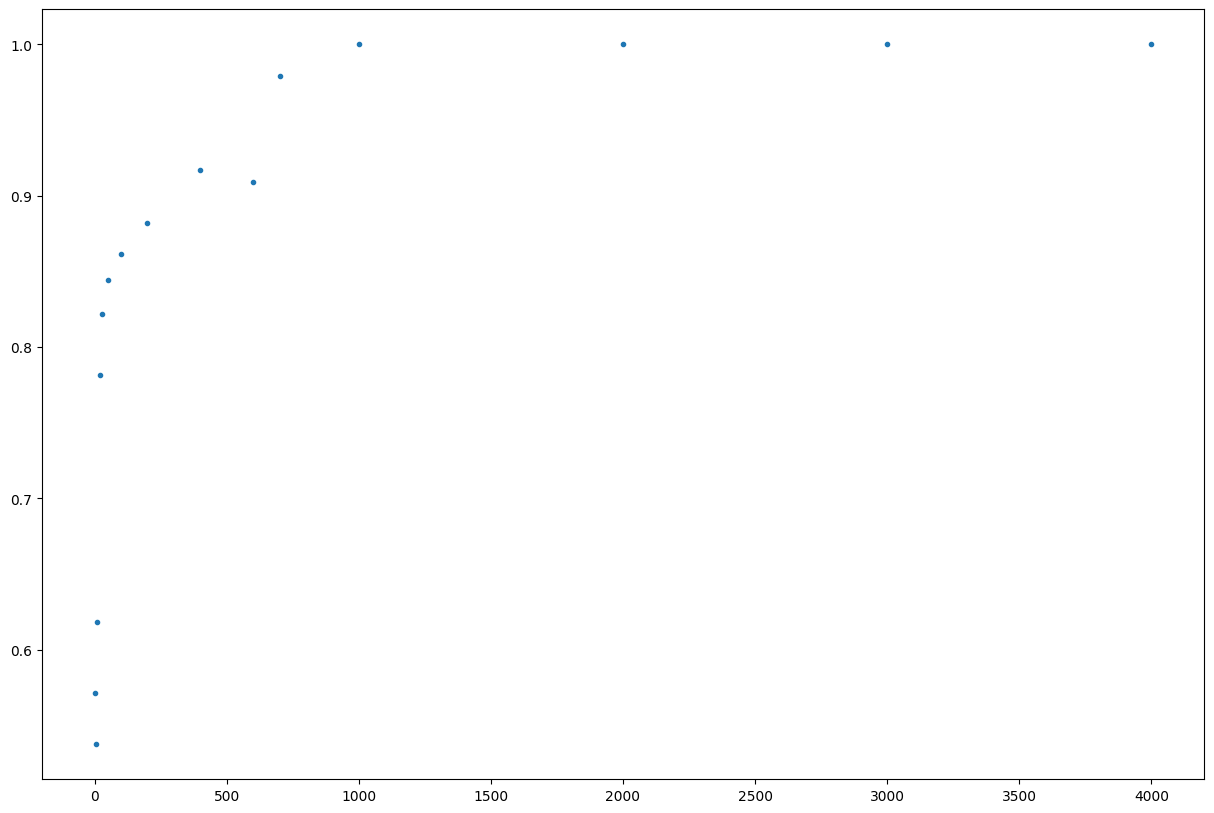

In [28]:
# Atlas Scaffold WD thresholding and loc match

WD_thresh = [0, 5, 10, 20, 30, 50,
             100, 200, 400, 600, 700,
             1000, 2000, 3000, 4000]

spec_FDR5_WD_match = []
spec_FDR5_WD_num = []

for i in WD_thresh:
    spec_FDR5_WD_match.append(WD_match(i, interaction_noOther_Phyto))
    
    spec_FDR5_WD_num.append(interaction_df_Phyto[interaction_df_Phyto['WD Score'] > i].shape[0])
    
print(spec_FDR5_WD_match)
plt.plot(WD_thresh, spec_FDR5_WD_match, '.')

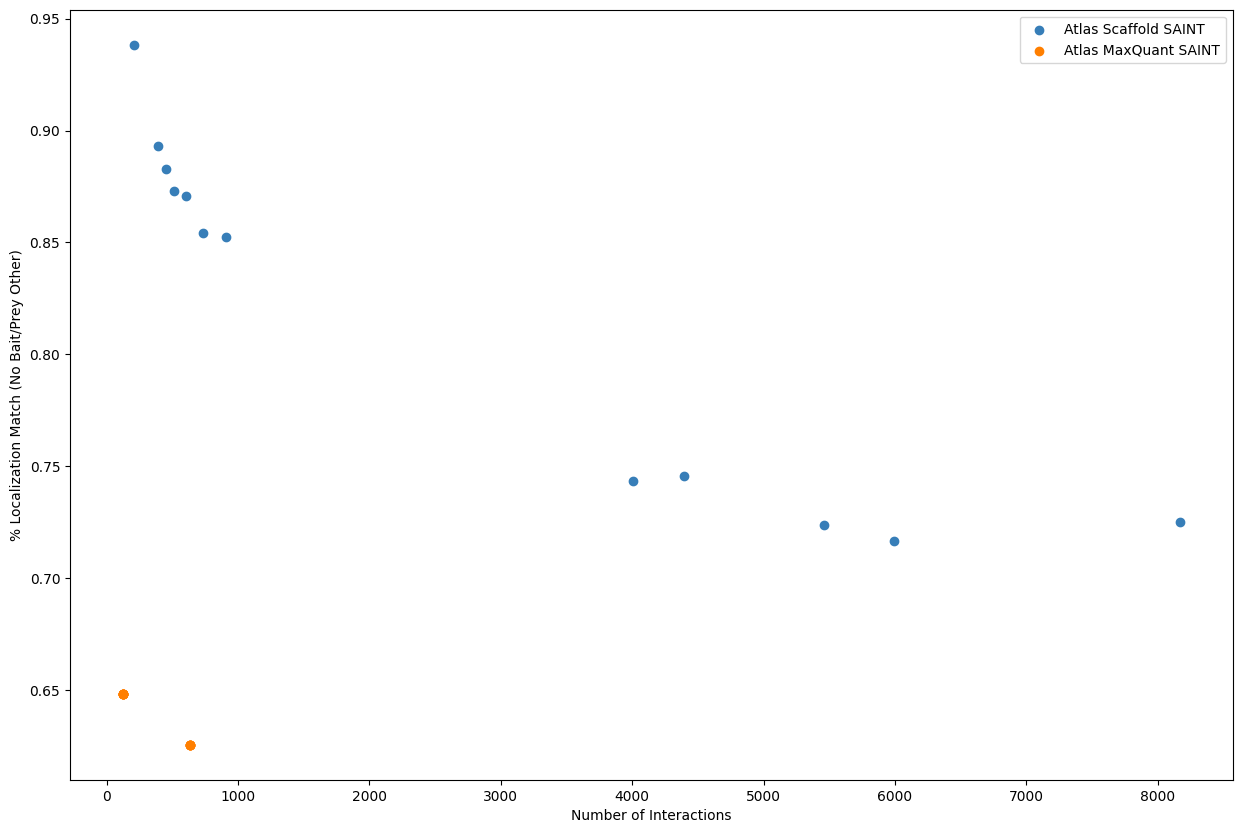

In [29]:
# Loc match % vs num interactions plot
plt.rcParams.update({"figure.figsize":(15,10)})

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']


plt.scatter(spec_FDR5_SAINT_num, spec_FDR5_SAINT_match, c=CB_color_cycle[0])

plt.scatter(LFQ_FDR5_SAINT_num, LFQ_FDR5_SAINT_match, c=CB_color_cycle[1])



# plt.tight_layout()
plt.legend(['Atlas Scaffold SAINT', 'Atlas MaxQuant SAINT'])

plt.xlabel('Number of Interactions')
plt.ylabel('% Localization Match (No Bait/Prey Other)')


plt.savefig('Compare_Methods_LocMatch_NumInteract_noLabel.png')

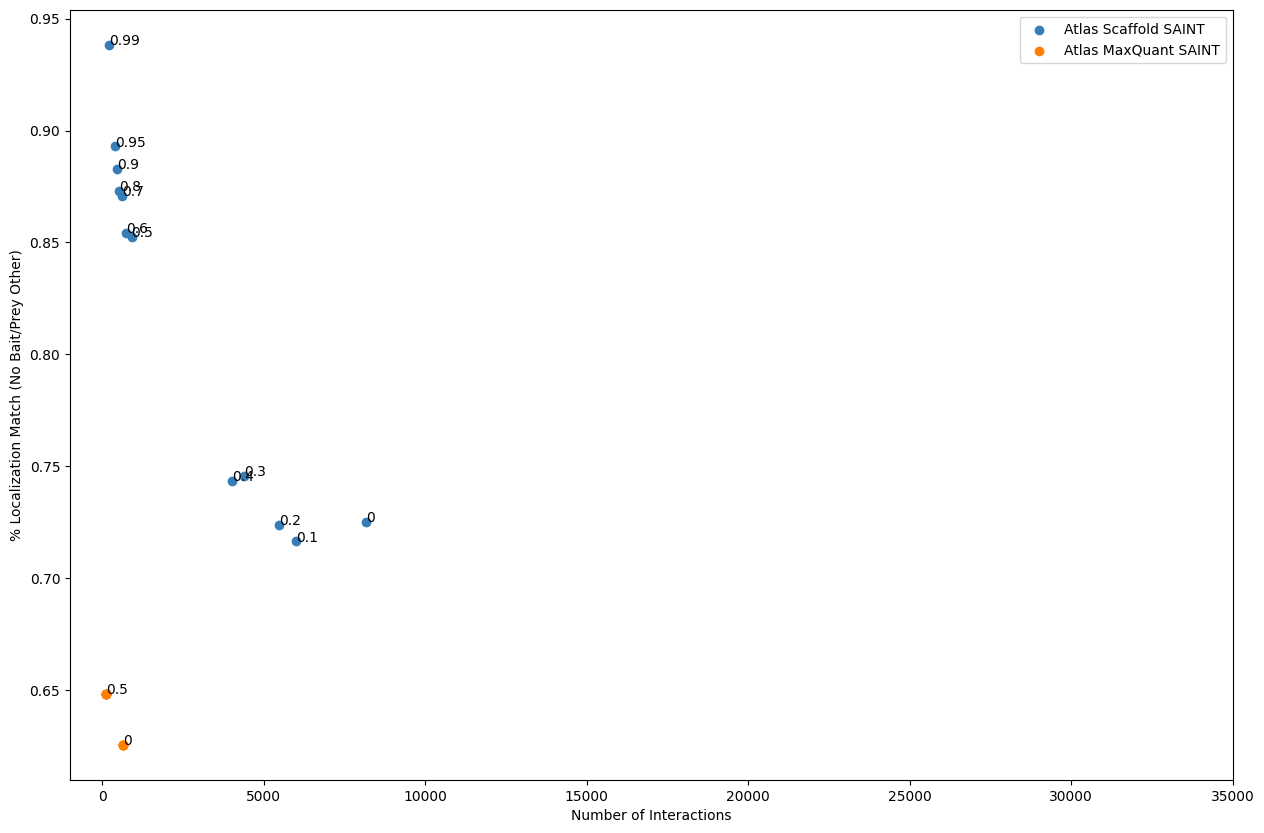

In [30]:
# Loc match % vs num interactions plot with threshold labels and zoom in on x axis
plt.rcParams.update({"figure.figsize":(15,10)})

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']


plt.scatter(spec_FDR5_SAINT_num, spec_FDR5_SAINT_match, c=CB_color_cycle[0])

plt.scatter(LFQ_FDR5_SAINT_num, LFQ_FDR5_SAINT_match, c=CB_color_cycle[1])



# plt.tight_layout()
plt.legend(['Atlas Scaffold SAINT', 'Atlas MaxQuant SAINT'])

plt.xlabel('Number of Interactions')
plt.ylabel('% Localization Match (No Bait/Prey Other)')

# label thresholds for points 
for i, txt in enumerate(SAINT_thresh):
    plt.annotate(txt, (spec_FDR5_SAINT_num[i], spec_FDR5_SAINT_match[i]))
    
    if txt == 0 or txt == 0.5:
        plt.annotate(txt, (LFQ_FDR5_SAINT_num[i], LFQ_FDR5_SAINT_match[i]))

    
    
plt.xlim([0-1000, 35000])

plt.savefig('Compare_Methods_LocMatch_NumInteract_Label_xZoom.png')

In [32]:
np.savetxt('S1F_ScaffoldWD_interacts.csv', spec_FDR5_WD_num, delimiter=',')
np.savetxt('S1F_ScaffoldWD_LMR.csv', spec_FDR5_WD_match, delimiter=',')
print(WD_thresh)


np.savetxt('S1F_ScaffoldSAINT_interacts.csv', spec_FDR5_SAINT_num, delimiter=',')
np.savetxt('S1F_ScaffoldSAINT_LMR.csv', spec_FDR5_SAINT_match, delimiter=',')
print(SAINT_thresh)


np.savetxt('S1F_MQ-SAINT_interacts.csv', LFQ_FDR5_SAINT_num, delimiter=',')
np.savetxt('S1F_MQ-SAINT_LMR.csv', LFQ_FDR5_SAINT_match, delimiter=',')


[0, 5, 10, 20, 30, 50, 100, 200, 400, 600, 700, 1000, 2000, 3000, 4000]
[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]


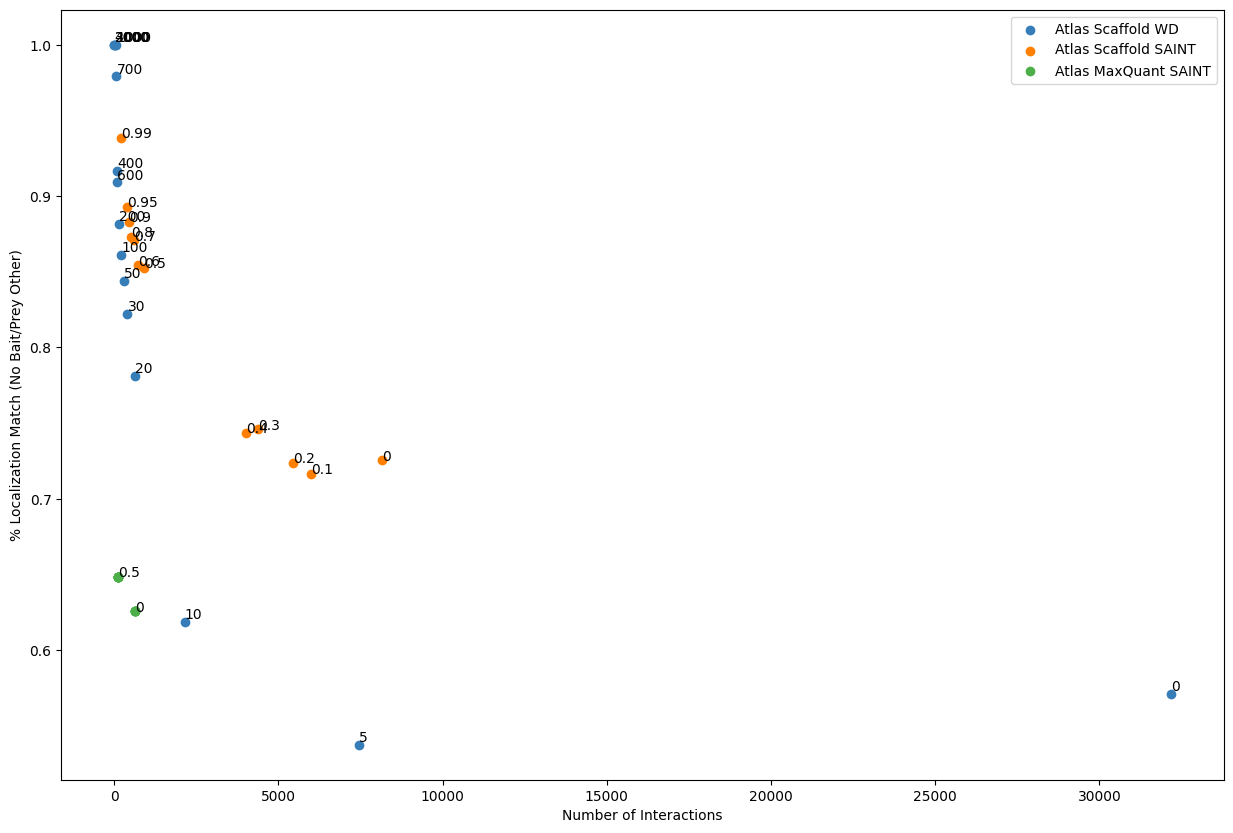

In [31]:
# Loc match % vs num interactions plot with threshold labels
plt.rcParams.update({"figure.figsize":(15,10)})

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']


plt.scatter(spec_FDR5_WD_num, spec_FDR5_WD_match, c=CB_color_cycle[0])

plt.scatter(spec_FDR5_SAINT_num, spec_FDR5_SAINT_match, c=CB_color_cycle[1])

plt.scatter(LFQ_FDR5_SAINT_num, LFQ_FDR5_SAINT_match, c=CB_color_cycle[2])


# plt.tight_layout()
plt.legend(['Atlas Scaffold WD', 'Atlas Scaffold SAINT', 'Atlas MaxQuant SAINT'])

plt.xlabel('Number of Interactions')
plt.ylabel('% Localization Match (No Bait/Prey Other)')

# label thresholds for points
for i, txt in enumerate(WD_thresh):
    plt.annotate(txt, (spec_FDR5_WD_num[i]+10, spec_FDR5_WD_match[i]+0.002),)
#                  bbox=dict(facecolor='none', edgecolor='red'))
    
for i, txt in enumerate(SAINT_thresh):
    plt.annotate(txt, (spec_FDR5_SAINT_num[i], spec_FDR5_SAINT_match[i]))
    
    if txt == 0 or txt == 0.5:
        plt.annotate(txt, (LFQ_FDR5_SAINT_num[i], LFQ_FDR5_SAINT_match[i]))
    


plt.savefig('Compare_Methods_LocMatch_NumInteract_Label.png')

### Phytozome WD Scores

In [28]:
# import full Phytozome dataset WD scores
import_Phyto_WD_full = "20250625_WD_counts1_zscore_20250625_PBv6_BaitPreyInfo_20240529_combineIsoforms_20240521_summary_baitCre_LWcorrected_expGelNums.xlsx"

# import WD scores
full_sheet = pd.read_excel(import_Phyto_WD_full, 
                           sheet_name = 0,
                           index_col = 0,
                           skiprows = 0) # load from sheet 1, start at 1st row

# import p values
p_full_sheet = pd.read_excel(import_Phyto_WD_full,
                        sheet_name = 1,
                        index_col = 0,
                        skiprows = 0)

# import z scores
z_full_sheet = pd.read_excel(import_Phyto_WD_full,
                        sheet_name = 2,
                        index_col = 0,
                        skiprows = 0)


In [29]:
# process sheets
# process full_sheet -- create sheet and matrix of WD scores
# sheet is dataframe bait CreID as column names, prey CreID as row indices
# matrix is numpy 2D array with just WD values

start_col = 14 # first bait is at 15th column in full_sheet
start_row = 13

bait_creID = full_sheet.loc['Bait CreID'][start_col:]
prey_creID = full_sheet['Prey CreID'].iloc[start_row:]

# localizations
bait_loc = full_sheet.loc['Bait Experimental Localization'][start_col:]
bait_loc.index = bait_creID.to_numpy()
bait_loc = bait_loc.replace(np.nan, 'N/A') # change NaNs to N/A

bait_pred_loc = full_sheet.loc['Bait PB-Chlamy Predicted Localization'][start_col:]
bait_pred_loc.index = bait_creID.to_numpy()

bait_predalgo_loc = full_sheet.loc['Bait PredAlgo Predicted Localization'][start_col:]
bait_predalgo_loc.index = bait_creID.to_numpy()

prey_pred_loc = full_sheet['Prey PB-Chlamy Predicted Localization'].iloc[start_row:]
prey_pred_loc.index = prey_creID.to_numpy()

prey_predalgo_loc = full_sheet['Prey PredAlgo Predicted Localization'].iloc[start_row:]
prey_predalgo_loc.index = prey_creID.to_numpy()

prey_exp_loc = full_sheet['Prey Experimental Localization'].iloc[start_row:]
prey_exp_loc.index = prey_creID.to_numpy()
        
# bait and prey Phytozome v6.1 info
baitInfo = full_sheet.loc['Bait Defline'][start_col:]
preyInfo = full_sheet['Prey Defline'][start_row:]

# bait and prey Phytozome v6.1 gene symbol
baitSymbol = full_sheet.loc['Bait Gene Symbol'][start_col:]
preySymbol = full_sheet['Prey Gene Symbol'][start_row:]

# GreenCut
bait_greencut = full_sheet.loc['Bait Greencut'][start_col:]
prey_greencut = full_sheet['Prey Greencut'][start_row:]


# Phytozome v6.1 Arabidopsis conservation
bait_conserve = full_sheet.loc['Bait Arabidopsis Conservation'][start_col:]
prey_conserve = full_sheet['Prey Arabidopsis Conservation'][start_row:]


# Phytozome v6.1 Arabidopsis conservation defline
bait_conserve_defline = full_sheet.loc['Bait Arabidopsis Conservation Defline'][start_col:]
prey_conserve_defline = full_sheet['Prey Arabidopsis Conservation Defline'][start_row:]


In [30]:
# create WD matrix

WD_mat = full_sheet.iloc[start_row:,start_col:].to_numpy().astype('float')
WD_nonzero = WD_mat[WD_mat > 0]

# create WD dataframe with column named with bait CreID, rows named with prey creID
WD_sheet = full_sheet.iloc[start_row:,start_col:].copy()
WD_sheet.columns = bait_creID.to_numpy()
WD_sheet.index = prey_creID.to_numpy()

num_interactions = WD_mat.shape[0]*WD_mat.shape[1]

In [31]:
# create p value matrix
p_mat = p_full_sheet.iloc[1:,start_col:].to_numpy()

# create p value dataframe
p_sheet = p_full_sheet.iloc[1:,start_col:].copy()
p_sheet.columns = bait_creID.to_numpy()
p_sheet.index = prey_creID.to_numpy()

In [32]:
# create raw z score matrix
z_mat = z_full_sheet.iloc[1:,start_col:].to_numpy()

# create p value dataframe
z_sheet = z_full_sheet.iloc[1:,start_col:].copy()
z_sheet.columns = bait_creID.to_numpy()
z_sheet.index = prey_creID.to_numpy()

In [33]:
# convert experimental localizations to binary for chloroplast, mitochondria, and secretory pathway
# (for easy comparison to prey predicted localizations)
exp_loc_list = np.unique(bait_loc.to_numpy())
exp_loc_binary = np.zeros([exp_loc_list.shape[0],3])
exp_loc_dict = {}

chloroplast_list = np.zeros_like(exp_loc_list)
mitochon_list = np.zeros_like(exp_loc_list)
secretory_list = np.zeros_like(exp_loc_list)


# exp_loc_summary = []

category_list = np.array([])
for i in range(exp_loc_list.shape[0]):
    loc = exp_loc_list[i]
    categories = loc.split('; ')
    for cat in categories:
        category_list = np.append(category_list, cat)
        if ('chloroplast' in cat) or ('Chloroplast' in cat):
            exp_loc_binary[i][0] = 1
            
        if ('mitochondria' in cat):
            exp_loc_binary[i][1] = 1
        
        if ('secretory' in cat):
            exp_loc_binary[i][2] = 1
            
    exp_loc_dict[loc] = exp_loc_binary[i]

In [34]:
# create list of each interaction with: (takes a few mins)
# bait CreID, prey CreID, 
# bait and prey localization (binary columns for chloroplast, mitochondria, secretory)
# WD score, raw z score, WD z score, p value


baitID_col = np.empty(num_interactions, dtype='O')
baitInfo_col = np.empty(num_interactions, dtype='O')
preyID_col = np.empty(num_interactions, dtype='O')
preyInfo_col = np.empty(num_interactions, dtype='O')

baitSymbol_col = np.empty(num_interactions, dtype='O')
preySymbol_col = np.empty(num_interactions, dtype='O')

bait_greencut_col = np.empty(num_interactions, dtype='O')
bait_conserve_col = np.empty(num_interactions, dtype='O')
bait_conserve_defline_col = np.empty(num_interactions, dtype='O')

prey_greencut_col = np.empty(num_interactions, dtype='O')
prey_conserve_col = np.empty(num_interactions, dtype='O')
prey_conserve_defline_col = np.empty(num_interactions, dtype='O')

bait_loc_col = np.empty(num_interactions, dtype='O') # experimental
bait_pred_loc_col = np.empty(num_interactions, dtype='O') # PB-Chlamy
bait_predalgo_loc_col = np.empty(num_interactions, dtype='O') # PredAlgo

prey_loc_col =  np.empty(num_interactions, dtype='O') # PB-Chlamy
prey_exp_loc_col = np.empty(num_interactions, dtype='O') # experimental
prey_predalgo_loc_col = np.empty(num_interactions, dtype='O') # PredAlgo
loc_match_col = np.zeros(num_interactions) # compare bait experimental to prey PB-Chlamy
bait_loc_array = np.zeros((num_interactions,3)) # based on bait experimental

WD_col = np.zeros(num_interactions, dtype='float')
p_col = np.zeros(num_interactions)
z_col = np.zeros(num_interactions, dtype='float')
# WDz_col = np.zeros(num_interactions, dtype='float')

index = 0 # interaction index
for i in tqdm(range(bait_creID.shape[0])): # loop over baits
    bait_loc_mat = exp_loc_dict[bait_loc.iloc[i]]
    bait = bait_creID.iloc[i]
    
    for j in range(prey_creID.shape[0]): # loop over preys
        prey = prey_creID.iloc[j]
        
        baitID_col[index] = bait_creID.iloc[i]
        preyID_col[index] = prey_creID.iloc[j]
        
        # bait and prey Phytozome v6.1 info and gene symbol
        baitInfo_col[index] = baitInfo[i]
        preyInfo_col[index] = preyInfo[j]
        
        baitSymbol_col[index] = baitSymbol[i]
        preySymbol_col[index] = preySymbol[j]
        
        # localizations    
        prey_loc = prey_pred_loc.iloc[j]
        bait_loc_col[index] = bait_loc.iloc[i]
        prey_loc_col[index] = prey_loc
        bait_loc_array[index] = bait_loc_mat
        
        bait_pred_loc_col[index] = bait_pred_loc[i]
        bait_predalgo_loc_col[index] = bait_predalgo_loc[i]
        prey_exp_loc_col[index] = prey_exp_loc[j]
        prey_predalgo_loc_col[index] = prey_predalgo_loc[j]
        
        # check if any overlap in localization of bait experimental and prey PB-Chlamy predicted loc
        loc_match_col[index] = (('Chloroplast' in prey_loc) and (bait_loc_mat[0] == 1)
                     or ('Mitochondrial' in prey_loc) and (bait_loc_mat[1] == 1)
                     or ('Secretory' in prey_loc) and (bait_loc_mat[2] == 1))
        
        # GreenCut
        bait_greencut_col[index] = bait_greencut[i]
        prey_greencut_col[index] = prey_greencut[j]
        
        
        # Phytozome v6.1 Arabidopsis conservation
        bait_conserve_col[index] = bait_conserve[i]
        prey_conserve_col[index] = prey_conserve[j]
        
        
        # Phytozome v6.1 Arabidopsis conservation defline
        bait_conserve_defline_col[index] = bait_conserve_defline[i]
        prey_conserve_defline_col[index] = prey_conserve_defline[j]
        
        
        # scores
        WD_col[index] = WD_mat[j][i]
        p_col[index] = p_mat[j][i]
#         WDz_col[index] = WD_zscore[j][i]
        z_col[index] = z_mat[j][i]

        index += 1 # increment interaction index

100%|███████████████████████████████████████| 1109/1109 [13:28<00:00,  1.37it/s]


In [35]:
# create dataframe of interactions
finalPhyto_interaction_df = pd.DataFrame(data=baitID_col, columns=['Bait CreID'])
finalPhyto_interaction_df['Bait Gene Symbol'] = baitSymbol_col
finalPhyto_interaction_df['Bait Info'] = baitInfo_col
finalPhyto_interaction_df['Prey CreID'] = preyID_col
finalPhyto_interaction_df['Prey Gene Symbol'] = preySymbol_col
finalPhyto_interaction_df['Prey Info'] = preyInfo_col
finalPhyto_interaction_df['WD Score'] = WD_col
finalPhyto_interaction_df['Z Score'] = z_col
# finalPhyto_interaction_df['WD Z Score'] = WDz_col

finalPhyto_interaction_df['Bait Experimental Localization'] = bait_loc_col
finalPhyto_interaction_df['Bait PB-Chlamy Predicted Localization'] = bait_pred_loc_col
finalPhyto_interaction_df['Bait PredAlgo Predicted Localization'] = bait_predalgo_loc_col

finalPhyto_interaction_df['Prey PB-Chlamy Predicted Localization'] = prey_loc_col
finalPhyto_interaction_df['Prey Experimental Localization'] = prey_exp_loc_col
finalPhyto_interaction_df['Prey PredAlgo Predicted Localization'] = prey_predalgo_loc_col

finalPhyto_interaction_df['Bait GreenCut'] = bait_greencut_col
finalPhyto_interaction_df['Bait Conservation'] = bait_conserve_col
finalPhyto_interaction_df['Bait Conservation Defline'] = bait_conserve_defline_col

finalPhyto_interaction_df['Prey GreenCut'] = prey_greencut_col
finalPhyto_interaction_df['Prey Conservation'] = prey_conserve_col
finalPhyto_interaction_df['Prey Conservation Defline'] = prey_conserve_defline_col

finalPhyto_interaction_df['Localization Match'] = loc_match_col
finalPhyto_interaction_df['p Value'] = p_col

In [36]:
# Phytozome Scaffold WD no Other:
keep_inds = []

for i in tqdm(range(finalPhyto_interaction_df.shape[0])):
    bloc = finalPhyto_interaction_df['Bait Experimental Localization'].iloc[i]
    bloc_code = exp_loc_dict[bloc]
    
    if np.sum(bloc_code[0:3]) > 0: # keep if bait is in chloroplast, mitochondria, or secretory
        keep_inds.append(i)

interaction_noBaitOther_finalPhyto = finalPhyto_interaction_df.iloc[keep_inds,:].copy()

interaction_noOther_finalPhyto = interaction_noBaitOther_Phyto[interaction_noBaitOther_Phyto['Prey PB-Chlamy Predicted Localization'] != 'Other']


100%|████████████████████████████| 14862818/14862818 [04:01<00:00, 61511.99it/s]


[0.5712261811999717, 0.5374525371073524, 0.6184738955823293, 0.7811634349030471, 0.8220338983050848, 0.8440860215053764, 0.8611111111111112, 0.8818897637795275, 0.9195402298850575, 0.90625, 1.0, -1]


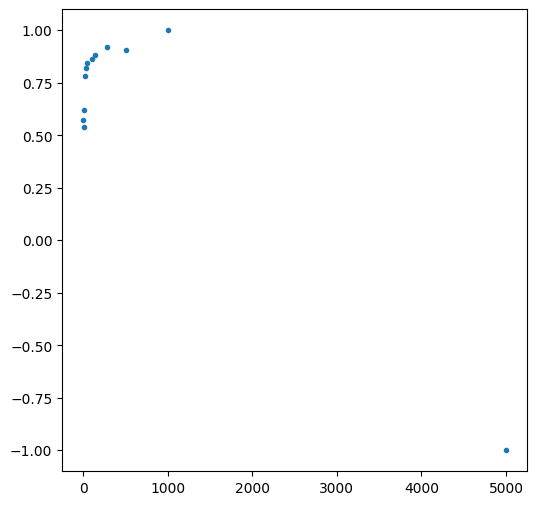

In [37]:
# Phytozome Scaffold WD threshold curve
WD_thresh_final = [0, 5, 10, 20, 30, 50, 100, 140, 280, 500, 1000, 5000]
# note: plateaus after 5000, points overlap on % loc vs num interact plot so not including higher WD thresholds

finalWD_match = []
finalWD_num = []

for i in WD_thresh_final:
    finalWD_match.append(WD_match(i, interaction_noOther_finalPhyto))
    
    finalWD_num.append(finalPhyto_interaction_df[finalPhyto_interaction_df['WD Score'] > i].shape[0])
    
print(finalWD_match)

plt.rcParams.update({"figure.figsize":(6,6)})
plt.plot(WD_thresh_final, finalWD_match, '.')

#### Phytozome Scaffold SAINTexpress

In [38]:
# import full dataset Scaffold + SAINT_Phytoexpress scores
SAINT_Phyto_fname = "20250630_SAINTexpress_R2L2_output.xlsx"

SAINT_Phyto_sheet = pd.read_excel(SAINT_Phyto_fname, 
                           sheet_name = 0,
                           index_col = None,
                           skiprows = 0) 

# separate spectral counts and extract p values (num nonzero replicates)
sep_spec = np.char.split(SAINT_Phyto_sheet['Spec'].to_numpy(dtype='str'), sep='|')
spec_rep1 = np.zeros(SAINT_Phyto_sheet.shape[0])
spec_rep2 = np.zeros(SAINT_Phyto_sheet.shape[0])
p_col = np.zeros(SAINT_Phyto_sheet.shape[0])

for i in range(sep_spec.shape[0]):
    rep1 = int(sep_spec[i][0])
    rep2 = int(sep_spec[i][1])
    
    spec_rep1[i] = rep1
    spec_rep2[i] = rep2
    
    p_col[i] = (rep1>0) + (rep2>0)
    
SAINT_Phyto_sheet['p Value'] = p_col
SAINT_Phyto_sheet['Rep 1 Spec'] = spec_rep1
SAINT_Phyto_sheet['Rep 2 Spec'] = spec_rep2


In [39]:
# import localizations
pred_loc_fname = 'PBChlamy_v5.6_v6.1.xlsx'
real_loc_fname = 'S6_experimental_localizations.xlsx'

# read experimental localizations conversion file
real_loc=pd.read_excel(real_loc_fname, skiprows=1)
real_loc['CreID'] = real_loc['CreID'].str.strip()
real_loc['Classification'] = real_loc['Classification'].str.strip()
real_loc_dict=real_loc.set_index('CreID')['Classification'].to_dict()

# read PB-Chlamy predicted localizations conversion file
pred_loc=pd.read_excel(pred_loc_fname, skiprows=0)
pred_loc['gene_ID'] = pred_loc['gene_ID'].str.strip()
pred_loc['predicted loc'] = pred_loc['predicted loc'].str.strip()
pred_loc_dict=pred_loc.set_index('gene_ID')['predicted loc'].to_dict()

In [40]:
# get experimental bait localizations
bait_cre = SAINT_Phyto_sheet['Bait']
exp_bait_loc_list = []
missed = []

print('No localization found in S6 for:')

for i in range(bait_cre.shape[0]):
    ID = bait_cre.to_numpy()[i]
    
    if ID in real_loc_dict:
        exp_bait_loc_list.append(real_loc_dict[ID])

    else:
        exp_bait_loc_list.append('Not Found')
#         print(ID)
        missed.append(ID)

print(np.unique(missed))
SAINT_Phyto_sheet['Bait Exp Loc'] = np.array(exp_bait_loc_list)


No localization found in S6 for:
['Cre02.g088200' 'Cre03.g187050' 'Cre06.g263850' 'Cre06.g278211'
 'Cre09.g416200' 'Cre10.g430350' 'Cre10.g451150' 'Cre10.g464850'
 'Cre11.g481650' 'Cre12.g528800' 'Cre12.g534600' 'Cre13.g581650'
 'Cre16.g663600']


In [41]:
# get predicted bait localizations
bait_cre = SAINT_Phyto_sheet['Bait']
creID_mat = bait_cre.to_numpy()
pred_bait_loc_list = []
missed = []


print('No localization found for:')

for i in range(creID_mat.shape[0]):
    ID = creID_mat[i]
    if ID in pred_loc_dict:
        pred_bait_loc_list.append(pred_loc_dict[ID])
    elif ID != 0:
        if ('CreCp' in ID) or ('Chloroplast Genome' in ID):
            pred_bait_loc_list.append('Chloroplast')
        elif ('SAGA1' in ID) or ('MITH1' in ID):
            pred_bait_loc_list.append('Chloroplast')
        else:
            pred_bait_loc_list.append('Not Found')
            print(ID, "in PB-Chlamy")
    else:
        pred_bait_loc_list.append('Not Found')
        missed.append(ID)
#         print(ID, "in PB-Chlamy")
        
SAINT_Phyto_sheet['Bait Pred Loc'] = np.array(pred_bait_loc_list)
print(np.unique(missed))

No localization found for:
[]


In [42]:
# get predicted prey localizations (for first CreID listed)
prey_cre = SAINT_Phyto_sheet['PreyGene']
creID_mat = prey_cre.to_numpy()
pred_prey_loc_list = []

print('No localization found for:')

for i in range(creID_mat.shape[0]):
    ID = creID_mat[i][:13]
    if ID in pred_loc_dict:
        pred_prey_loc_list.append(pred_loc_dict[ID])
    elif ID != 0:
        if ('CreCp' in ID) or ('Chloroplast Genome' in ID):
            pred_prey_loc_list.append('Chloroplast encoded')
        else:
            pred_prey_loc_list.append('Not Found')
            print(ID, "in PB-Chlamy")
    else:
        pred_prey_loc_list.append('Not Found')
        print(ID, "in PB-Chlamy")
        
SAINT_Phyto_sheet['Prey Pred Loc'] = np.array(pred_prey_loc_list)

No localization found for:
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy
Venus-FLAG in

Venus-FLAG in PB-Chlamy
Venus-FLAG in PB-Chlamy


In [43]:
# determine localization match
loc_match_col = []

for i in tqdm(range(SAINT_Phyto_sheet.shape[0])):
    bait_loc = SAINT_Phyto_sheet['Bait Exp Loc'].iloc[i]
    bait_loc_mat = exp_loc_dict[bait_loc]
    prey_loc = SAINT_Phyto_sheet['Prey Pred Loc'].iloc[i]
    
    loc_match_col.append((('Chloroplast' in prey_loc) and (bait_loc_mat[0] == 1)
                         or ('Mitochondrial' in prey_loc) and (bait_loc_mat[1] == 1)
                         or ('Secretory' in prey_loc) and (bait_loc_mat[2] == 1)))
    
SAINT_Phyto_sheet['Loc Match'] = loc_match_col


100%|████████████████████████████████| 662610/662610 [00:11<00:00, 56421.25it/s]


In [45]:
# Scaffold SAINTexpress full dataset:
keep_inds = []

for i in tqdm(range(SAINT_Phyto_sheet.shape[0])):
    bloc = SAINT_Phyto_sheet['Bait Exp Loc'].iloc[i]
    bloc_code = exp_loc_dict[bloc] 
    
    if np.sum(bloc_code[0:3]) > 0: # keep if bait is in chloroplast, mitochondria, or secretory
        keep_inds.append(i)

SAINT_Phyto_noBaitOther_sheet = SAINT_Phyto_sheet.iloc[keep_inds,:].copy()

SAINT_Phyto_noOther_sheet = SAINT_Phyto_noBaitOther_sheet[SAINT_Phyto_noBaitOther_sheet['Prey Pred Loc'] != 'Other']


100%|████████████████████████████████| 662610/662610 [00:10<00:00, 62019.12it/s]


In [46]:
# Phytozome Scaffold SAINTexpress
SAINT_Phyto_thresh = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.95,0.99]

SAINT_Phyto_match = []
SAINT_Phyto_num = []

for i in SAINT_Phyto_thresh:
    SAINT_Phyto_match.append(SAINT_match(i, SAINT_Phyto_noOther_sheet))
    
    SAINT_Phyto_num.append(SAINT_Phyto_sheet[SAINT_Phyto_sheet['AvgP'] > i].shape[0])


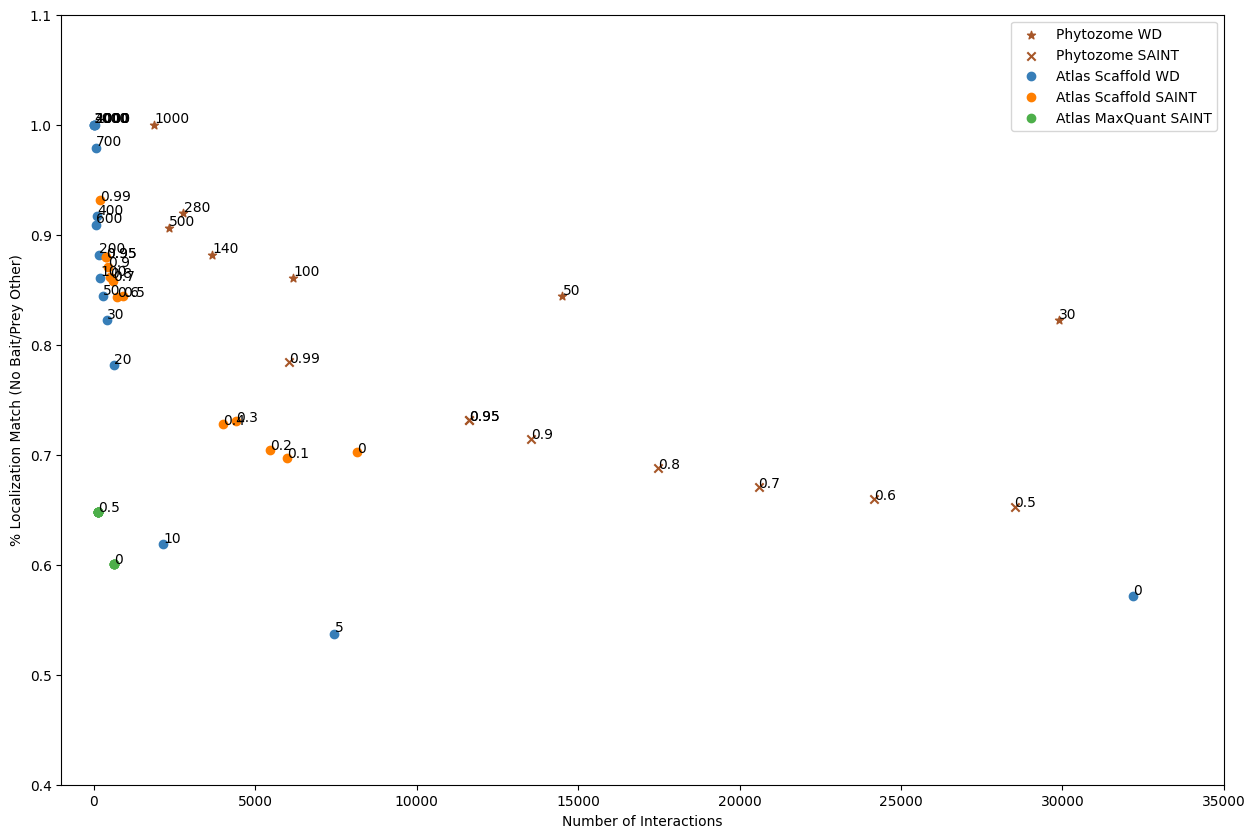

In [47]:
# Loc match % vs num interactions plot with threshold labels and zoom in on x axis
plt.rcParams.update({"figure.figsize":(15,10)})

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.scatter(finalWD_num, finalWD_match, marker='*', c=CB_color_cycle[4])

plt.scatter(SAINT_Phyto_num, SAINT_Phyto_match, marker='x', c=CB_color_cycle[4])

plt.scatter(spec_FDR5_WD_num, spec_FDR5_WD_match, c=CB_color_cycle[0])

plt.scatter(spec_FDR5_SAINT_num, spec_FDR5_SAINT_match, c=CB_color_cycle[1])

plt.scatter(LFQ_FDR5_SAINT_num, LFQ_FDR5_SAINT_match, c=CB_color_cycle[2])


# plt.tight_layout()
plt.legend(['Phytozome WD', 'Phytozome SAINT',
            'Atlas Scaffold WD','Atlas Scaffold SAINT', 'Atlas MaxQuant SAINT'])

plt.xlabel('Number of Interactions')
plt.ylabel('% Localization Match (No Bait/Prey Other)')

# label thresholds for points
for i, txt in enumerate(WD_thresh):
    plt.annotate(txt, (spec_FDR5_WD_num[i]+10, spec_FDR5_WD_match[i]+0.002),)
#                  bbox=dict(facecolor='none', edgecolor='red'))
    
for i, txt in enumerate(SAINT_thresh):
    plt.annotate(txt, (spec_FDR5_SAINT_num[i], spec_FDR5_SAINT_match[i]))
    plt.annotate(txt, (SAINT_Phyto_num[i], SAINT_Phyto_match[i]))
    
    if txt == 0 or txt == 0.5:
        plt.annotate(txt, (LFQ_FDR5_SAINT_num[i], LFQ_FDR5_SAINT_match[i]))
    
for i, txt in enumerate(WD_thresh_final):
    plt.annotate(txt, (finalWD_num[i]+10, finalWD_match[i]+0.002),)
    
plt.xlim([0-1000, 35000])
plt.ylim([0.4,1.1])

plt.savefig('Compare_Methods_LocMatch_NumInteract_Label_xZoom.png')

(0.4, 1.1)

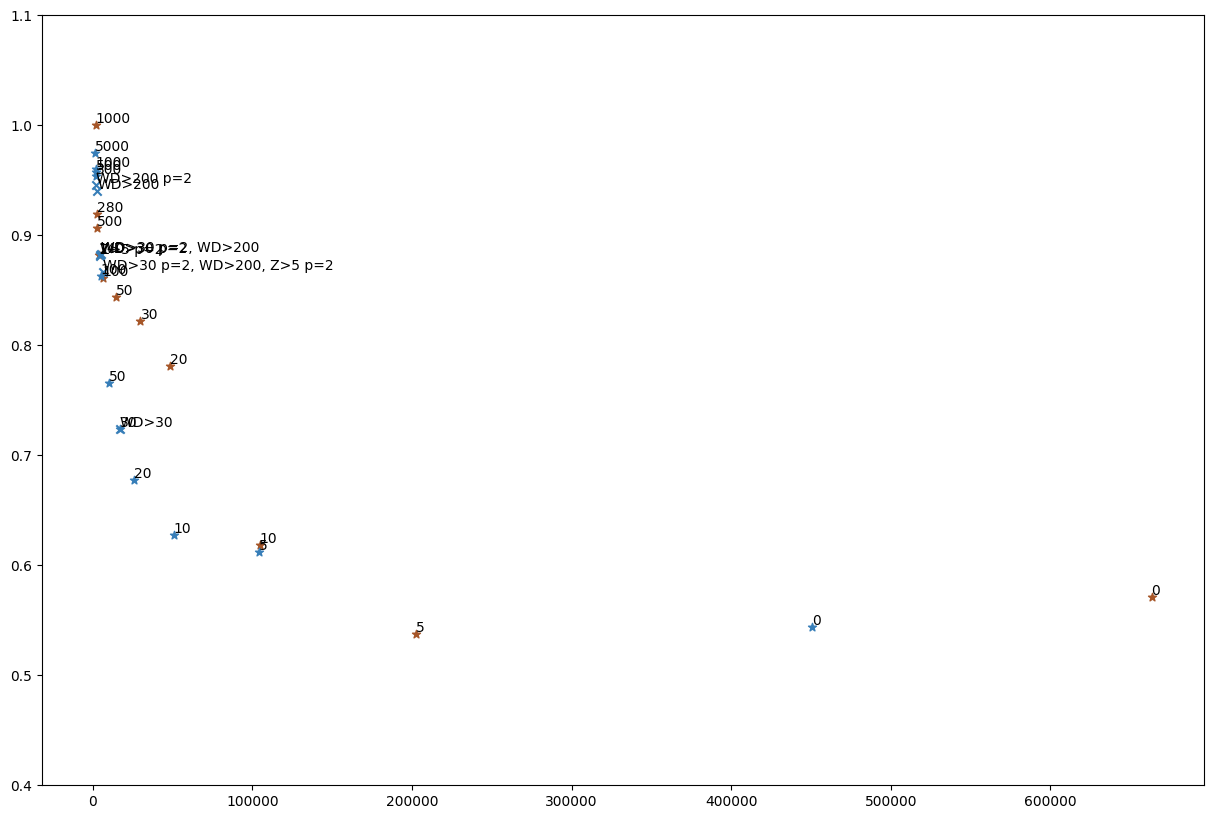

In [76]:
plt.scatter(finalWD_num, finalWD_match, marker='*', c=CB_color_cycle[4])  


for i, txt in enumerate(WD_thresh_final):
    plt.annotate(txt, (finalWD_num[i]+10, finalWD_match[i]+0.002),)
    
for i, txt in enumerate(Uniprot_tier_WD_criteria):
    plt.annotate(txt, (Uniprot_tier_WD_num[i]+10, Uniprot_tier_WD_match[i]+0.002))

for i, txt in enumerate(WD_thresh_Uniprot):
    plt.annotate(txt, (UniWD_num[i]+10, UniWD_match[i]+0.002),)

plt.ylim([0.4,1.1])

(0.4, 1.1)

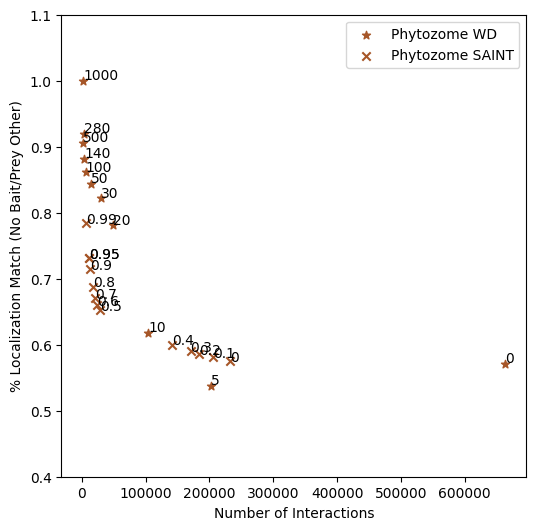

In [48]:
plt.rcParams.update({"figure.figsize":(6,6)})

plt.scatter(finalWD_num, finalWD_match, marker='*', c=CB_color_cycle[4])

plt.scatter(SAINT_Phyto_num, SAINT_Phyto_match, marker='x', c=CB_color_cycle[4])


for i, txt in enumerate(WD_thresh_final):
    plt.annotate(txt, (finalWD_num[i]+10, finalWD_match[i]+0.002),)
    
for i, txt in enumerate(SAINT_thresh):
    plt.annotate(txt, (SAINT_Phyto_num[i], SAINT_Phyto_match[i]))
    
    
plt.legend(['Phytozome WD', 'Phytozome SAINT'])
plt.xlabel('Number of Interactions')
plt.ylabel('% Localization Match (No Bait/Prey Other)')

plt.ylim([0.4,1.1])

In [80]:
np.savetxt('S1E_PhytoWD_interacts.csv', finalWD_num, delimiter=',')
np.savetxt('S1E_PhytoWD_LMR.csv', finalWD_match, delimiter=',')

np.savetxt('S1E_PhytoSAINT_interacts.csv', SAINT_Phyto_num, delimiter=',')
np.savetxt('S1E_PhytoSAINT_LMR.csv', SAINT_Phyto_match, delimiter=',')

In [49]:
print(WD_thresh_final)

print(SAINT_thresh)

[0, 5, 10, 20, 30, 50, 100, 140, 280, 500, 1000, 5000]
[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.95, 0.99]


(-1000.0, 60000.0)

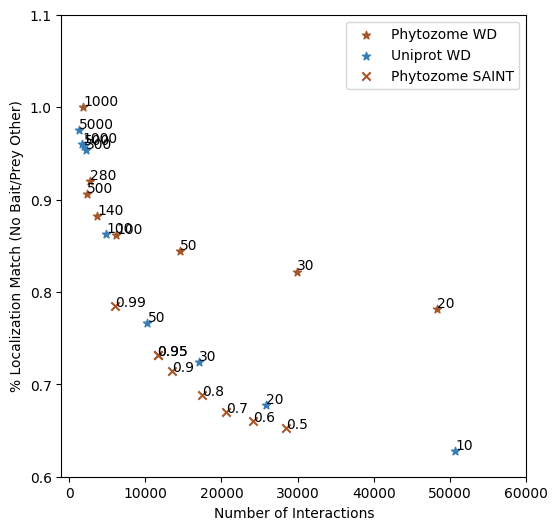

In [78]:
plt.rcParams.update({"figure.figsize":(6,6)})

plt.scatter(finalWD_num, finalWD_match, marker='*', c=CB_color_cycle[4])  
# plt.scatter(Uniprot_tier_WD_num, Uniprot_tier_WD_match, marker='x', c=CB_color_cycle[0])
plt.scatter(UniWD_num, UniWD_match, marker='*', c=CB_color_cycle[0])

# plt.scatter(Uniprot_SAINT_num, Uniprot_SAINT_match, marker='x', c=CB_color_cycle[0])

plt.scatter(SAINT_Phyto_num, SAINT_Phyto_match, marker='x', c=CB_color_cycle[4])


for i, txt in enumerate(WD_thresh_final):
    plt.annotate(txt, (finalWD_num[i]+10, finalWD_match[i]+0.002),)
    
# for i, txt in enumerate(Uniprot_tier_WD_criteria):
#     plt.annotate(txt, (Uniprot_tier_WD_num[i]+10, Uniprot_tier_WD_match[i]+0.002))

for i, txt in enumerate(WD_thresh_Uniprot):
    plt.annotate(txt, (UniWD_num[i]+10, UniWD_match[i]+0.002),)
    
for i, txt in enumerate(SAINT_thresh):
#     plt.annotate(txt, (Uniprot_SAINT_num[i], Uniprot_SAINT_match[i]))
    plt.annotate(txt, (SAINT_Phyto_num[i], SAINT_Phyto_match[i]))
    
    
plt.legend(['Phytozome WD', 'Uniprot WD', 'Phytozome SAINT'])
plt.xlabel('Number of Interactions')
plt.ylabel('% Localization Match (No Bait/Prey Other)')

plt.ylim([0.6,1.1])
plt.xlim([-1000, 60000])